In [69]:
import pymysql
from cryptography.fernet import Fernet
import json
from collections import namedtuple
import time
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import pandas as pd
from sqlalchemy import create_engine 

%matplotlib inline


<b> Increase the size of the screen to view more features </b>

In [70]:
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

<b> Decrypt the credentials </b>

In [71]:
#Uncode the secret license file
def unencrypt():
    try:
        key = b'IXx5rHfP15FqP4ahx2pwcud-XmcBzU553Ri6p-nVhnc=' #Fernet.generate_key()
        cipher_suite = Fernet(key)
        with open('/usr/local/etc/musicmood_bytes.bin', 'rb') as file_object:
            for line in file_object:
                encryptedpwd = line
        uncipher_text = (cipher_suite.decrypt(encryptedpwd))
        plain_text_encryptedpassword = bytes(uncipher_text).decode("utf-8") #convert to string
        x = json.loads(plain_text_encryptedpassword, object_hook=lambda d: namedtuple('X', d.keys())(*d.values()))
        return x
    except Exception as e:
        print(str(e))
        return "Error" 

<b> Connect to the Database </b>

In [72]:
#Setup the database connection
credentials = unencrypt()
user_id = credentials.user
user_password = credentials.password
dbname = credentials.dbname
server = credentials.server
conn = pymysql.connect(server,user_id,user_password,dbname)

<b> Obtain the data from the Database </b>

In [91]:
start_time = time.time()
df = pd.read_sql('SELECT * FROM songs_instance', con = conn)
print("--- %s seconds ---" % (time.time() - start_time))
df.head(15)

--- 0.9126160144805908 seconds ---


,trackid,bill_popularity,song,artist,weeks_ranked,highest_rank,lowest_rank,weeks_top_spot,weeks_top_10,weeks_top_20,weeks_top_30,weeks_top_40,weeks_top_50,average_rank,first_appearance,year_first_appear,last_appearance,year_last_appear,decade,duration,end_of_fade_in,key_confidence,key_song,loudness,mode,mode_confidence,start_of_fade_out,tempo,time_signature,time_signature_confidence,GrossDomesticProduct,PersonalIncome,Unemployment_Rate_Year_AVG,Adjusted_CPI_Year_AVG,Misery_Index_Year_AVG,genre,Blues,ChildrensMusic,Christian_Gospel,Christmas,Comedy,Country_,Folk,House_Electronic_Trance,Jazz,Last_Position,Latin,Metal,Pop_Standards,Pop,Punk,R_And_B,Rap_Hip_Hop,Rock_And_Roll,Rock,Ska_Reggae_Dancehall,Soul,Soundtrack,number_1s,weeks_at_number_1,chart_appearances,speed_general
0,TRTLZZL128EF342C64,1520,I Guess That's Why They Call It The Blues,Elton John,23,4,97,0,6,10,12,15,17,34.0,1983-10-29,1983,1984-03-31,1984,1980,286,0.624,0.788,0,-8.207,1,0.730,274.355,120.658,3,1.000,3638.1,2970.3,9.60,99.58,12.76,Rock,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,93.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,23.0,887,3
1,TRDFUQS12903CCEFD0,1611,Borderline,Madonna,30,10,98,0,1,8,12,15,17,46.0,1984-03-10,1984,1984-09-29,1984,1980,238,0.213,0.435,4,-5.906,0,0.399,222.586,119.888,4,1.000,4040.7,3281.8,7.51,103.93,11.88,Pop,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,94.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,32.0,857,2
2,TRALSBI12903CCEEA0,1118,Holiday,Madonna,21,16,94,0,0,3,6,11,12,47.0,1983-10-29,1983,1984-03-17,1984,1980,368,0.398,0.427,9,-6.061,0,0.298,360.240,115.613,4,0.868,3638.1,2970.3,9.60,99.58,12.76,Pop,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,88.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,32.0,857,2
3,TRZTWSZ128E0792D57,1669,I Just Called To Say I Love You,Stevie Wonder,26,1,99,3,10,12,14,15,17,36.0,1984-08-18,1984,1985-02-09,1985,1980,279,0.000,0.930,1,-8.687,1,0.791,276.962,112.747,4,1.000,4040.7,3281.8,7.51,103.93,11.88,Soul,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,93.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,7.0,11.0,657,2
4,TRPNZUI128F14964BD,1619,Master Blaster (Jammin'),Stevie Wonder,23,5,97,0,8,13,15,16,18,30.0,1980-09-20,1980,1981-02-21,1981,1980,388,0.311,0.364,10,-13.811,0,0.362,381.515,131.183,4,0.000,2862.5,2317.5,7.18,82.38,20.70,Soul,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,11.0,657,3
5,TRMDYGQ128F14963D6,1472,Part-Time Lover,Stevie Wonder,21,1,93,1,8,10,12,14,16,30.0,1985-09-07,1985,1986-01-25,1986,1980,253,0.305,0.631,3,-12.894,0,0.629,247.130,87.268,4,0.709,4346.7,3516.3,7.19,107.60,10.72,Soul,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,11.0,657,2
6,TRABKEC128F424DF63,1379,You Haven't Done Nothin,Stevie Wonder,19,1,93,1,7,11,13,14,15,27.0,1974-08-03,1974,1974-12-07,1974,1970,203,0.194,0.409,10,-11.170,0,0.326,194.258,102.516,4,0.554,1548.8,1249.3,5.64,49.32,16.63,Soul,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,11.0,657,2
7,TRWJKVP128F92DCA7E,1850,Billie Jean,Michael Jackson,25,1,98,7,11,13,17,18,20,26.0,1983-01-22,1983,2014-06-07,2014,1980,383,0.154,0.461,9,-5.038,0,0.487,367.926,117.032,4,0.533,3638.1,2970.3,9.60,99.58,12.76,Pop,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,30.0,607,2
8,TRBIGLJ12903CBAC47,1796,Rock With You,Michael Jackson,24,1,96,4,9,13,17,19,19,25.0,1979-11-03,1979,1980-04-12,1980,1970,204,0.108,0.269,11,-6.029,1,0.767,196.034,114.547,4,0.507,2632.1,2078.2,5.85,72.58,17.07,Pop,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,76.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,30.0,607,2
9,TRXHRYZ128F4264957,1302,Don't Stop 'til You Get Enough,Michael Jackson,21,1,98,1,6,9,10,12,13,38.0,1979-07-28,1979,1979-12-15,1979,1970,367,2.583,0.585,11,-4.222,1,0.680,347.945,119.235,4,0.472,2632.1,2078.2,5.85,72.58,17.07,Pop,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,87.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,

<B> Describe the dataset </B>

In [93]:
df.describe()

,bill_popularity,weeks_ranked,highest_rank,lowest_rank,weeks_top_spot,weeks_top_10,weeks_top_20,weeks_top_30,weeks_top_40,weeks_top_50,average_rank,year_first_appear,year_last_appear,decade,duration,end_of_fade_in,key_confidence,key_song,loudness,mode,mode_confidence,start_of_fade_out,tempo,time_signature,time_signature_confidence,GrossDomesticProduct,PersonalIncome,Unemployment_Rate_Year_AVG,Adjusted_CPI_Year_AVG,Misery_Index_Year_AVG,Blues,ChildrensMusic,Christian_Gospel,Christmas,Comedy,Country_,Folk,House_Electronic_Trance,Jazz,Last_Position,Latin,Metal,Pop_Standards,Pop,Punk,R_And_B,Rap_Hip_Hop,Rock_And_Roll,Rock,Ska_Reggae_Dancehall,Soul,Soundtrack,number_1s,weeks_at_number_1,chart_appearances,speed_general
count,8011.000000,8011.000000,8011.000000,8011.000000,8011.000000,8011.000000,8011.000000,8011.000000,8011.000000,8011.000000,8011.000000,8011.000000,8011.000000,8011.000000,8011.000000,8011.000000,8011.000000,8011.000000,8011.000000,8011.000000,8011.000000,8011.000000,8011.000000,8011.000000,8011.000000,8011.000000,8011.000000,8007.000000,8007.000000,8007.000000,6067.000000,6067.000000,6067.000000,6067.000000,6067.000000,6067.000000,6067.000000,6067.000000,6067.000000,6067.000000,6067.000000,6067.000000,6067.000000,6067.000000,6067.000000,6067.000000,6067.000000,6067.000000,6067.000000,6067.000000,6067.000000,6067.000000,2785.000000,2785.000000,8011.000000,8011.000000
mean,711.472600,13.239046,37.353139,88.766196,0.176757,1.671077,3.248284,4.744352,6.144426,7.476844,55.146923,1981.830358,1982.139683,1977.289976,230.380727,0.758148,0.483208,5.253027,-9.425440,0.743228,0.502027,220.998981,121.816716,3.624391,0.504399,4724.740956,3883.905081,5.894344,95.613929,10.025293,0.075655,0.000494,0.000494,0.054722,0.001154,0.118180,0.125762,0.059337,0.053733,82.440910,0.008076,0.037910,0.104170,0.347618,0.017472,0.186583,0.035438,0.131037,0.462832,0.006099,0.264546,0.000494,2.385637,6.597127,158.189365,2.467482
std,681.501624,8.789970,29.747926,11.755069,1.245201,3.887210,5.743423,7.002162,7.897311,8.519600,23.516727,14.984688,15.071783,14.904043,78.115923,1.441174,0.271425,3.588790,3.588586,0.436880,0.184437,77.396925,29.299979,1.083458,0.371088,4546.784368,3799.796452,1.549374,62.428190,3.478023,0.264467,0.022233,0.022233,0.227456,0.033951,0.322848,0.331609,0.236275,0.225509,18.485412,0.089513,0.190994,0.305506,0.476253,0.131031,0.389609,0.184898,0.337468,0.498658,0.077861,0.441127,0.022233,2.500418,9.168129,154.621928,0.557581
min,0.000000,1.000000,1.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1957.000000,1958.000000,1950.000000,17.000000,0.000000,0.000000,0.000000,-33.076000,0.000000,0.000000,17.084000,0.000000,1.000000,0.000000,474.900000,368.500000,3.490000,28.110000,5.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,194.000000,7.000000,10.000000,84.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.000000,1969.000000,1969.000000,1960.000000,176.000000,0.079000,0.279000,2.000000,-11.782000,0.000000,0.387000,167.854500,100.245000,4.000000,0.114000,1019.900000,800.300000,4.860000,36.680000,7.380000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,78.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,42.000000,2.000000
50%,577.000000,12.000000,31.000000,93.000000,0.000000,0.000000,0.000000,0.000000,4.000000,6.000000,53.000000,1980.000000,1980.000000,1980.000000,221.000000,0.247000,0.502000,5.000000,-9.145000,1.000000,0.512000,211.702000,119.968000,4.000000,0.534000,2862.500000,2317.500000,5.620000,82.380000,8.950000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,87.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

<b> Generate Dummy Columns to include Genre (categorical) in the analysis </b>

In [94]:
genres = pd.get_dummies(df['genre'],prefix='gnr',dummy_na=False)
genres.head()

,gnr_Blues,gnr_Country,gnr_Folk,gnr_Funk,gnr_House Electronic Trance,gnr_Jazz,gnr_Latin,gnr_Metal,gnr_Pop,gnr_Pop Standards,gnr_Punk,gnr_Rap Hip Hop,gnr_Rhythm and Blues,gnr_Rock,gnr_Rock and Roll,gnr_Ska Reggae Dancehall,gnr_Soul
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


<b> Drop the Last One to avoid self cancellation</b>

In [95]:
genres.drop(['gnr_Soul'],axis =1,inplace=True)
genres.head()

,gnr_Blues,gnr_Country,gnr_Folk,gnr_Funk,gnr_House Electronic Trance,gnr_Jazz,gnr_Latin,gnr_Metal,gnr_Pop,gnr_Pop Standards,gnr_Punk,gnr_Rap Hip Hop,gnr_Rhythm and Blues,gnr_Rock,gnr_Rock and Roll,gnr_Ska Reggae Dancehall
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<b> Drop older loaded genre columns </b> 

In [96]:
df.drop(['end_of_fade_in','key_confidence','mode_confidence','start_of_fade_out','time_signature_confidence','GrossDomesticProduct','PersonalIncome','Unemployment_Rate_Year_AVG','Adjusted_CPI_Year_AVG','Misery_Index_Year_AVG','Blues',  'ChildrensMusic', 'Christian_Gospel', 'Christmas', 'Comedy', 'Country_', 'Folk', 'House_Electronic_Trance', 'Jazz', 'Latin', 'Metal', 'Pop_Standards', 'Pop', 'Punk', 'R_And_B', 'Rap_Hip_Hop', 'Rock_And_Roll', 'Rock', 'Ska_Reggae_Dancehall', 'Soul', 'Soundtrack'],axis=1, inplace=True)

df.describe()


,bill_popularity,weeks_ranked,highest_rank,lowest_rank,weeks_top_spot,weeks_top_10,weeks_top_20,weeks_top_30,weeks_top_40,weeks_top_50,average_rank,year_first_appear,year_last_appear,decade,duration,key_song,loudness,mode,tempo,time_signature,Last_Position,number_1s,weeks_at_number_1,chart_appearances,speed_general
count,8011.000000,8011.000000,8011.000000,8011.000000,8011.000000,8011.000000,8011.000000,8011.000000,8011.000000,8011.000000,8011.000000,8011.000000,8011.000000,8011.000000,8011.000000,8011.000000,8011.000000,8011.000000,8011.000000,8011.000000,6067.000000,2785.000000,2785.000000,8011.000000,8011.000000
mean,711.472600,13.239046,37.353139,88.766196,0.176757,1.671077,3.248284,4.744352,6.144426,7.476844,55.146923,1981.830358,1982.139683,1977.289976,230.380727,5.253027,-9.425440,0.743228,121.816716,3.624391,82.440910,2.385637,6.597127,158.189365,2.467482
std,681.501624,8.789970,29.747926,11.755069,1.245201,3.887210,5.743423,7.002162,7.897311,8.519600,23.516727,14.984688,15.071783,14.904043,78.115923,3.588790,3.588586,0.436880,29.299979,1.083458,18.485412,2.500418,9.168129,154.621928,0.557581
min,0.000000,1.000000,1.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1957.000000,1958.000000,1950.000000,17.000000,0.000000,-33.076000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,194.000000,7.000000,10.000000,84.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.000000,1969.000000,1969.000000,1960.000000,176.000000,2.000000,-11.782000,0.000000,100.245000,4.000000,78.000000,1.000000,2.000000,42.000000,2.000000
50%,577.000000,12.000000,31.000000,93.000000,0.000000,0.000000,0.000000,0.000000,4.000000,6.000000,53.000000,1980.000000,1980.000000,1980.000000,221.000000,5.000000,-9.145000,1.000000,119.968000,4.000000,87.000000,1.000000,4.000000,107.000000,2.000000
75%,1062.500000,18.000000,61.000000,98.000000,0.000000,1.000000,6.000000,9.000000,11.000000,12.000000,75.000000,1994.000000,1994.000000,1990.000000,263.000000,9.000000,-6.695500,1.000000,137.630000,4.000000,94.000000,3.000000,7.000000,216.000000,3.000000
max,9009.000000,104.000000,100.000000,100.000000,84.000000,88.000000,95.000000,96.000000,104.000000,104.000000,100.000000,2017.000000,2018.000000,2010.000000,1241.000000,11.000000,-0.278000,1.000000,244.788000,7.000000,110.000000,19.000000,86.000000,887.000000,3.000000


<b>Handling missing samples</b>

In [97]:
mean_last_pos = df['Last_Position'].mean()
print(mean_last_pos)
print(df.shape)
values = {'Last_Position': mean_last_pos, 'number_1s': 0, 'weeks_at_number_1': 0}
df.fillna(value=values, inplace=True)
df.describe()


82.44090984011868
(8011, 31)


,bill_popularity,weeks_ranked,highest_rank,lowest_rank,weeks_top_spot,weeks_top_10,weeks_top_20,weeks_top_30,weeks_top_40,weeks_top_50,average_rank,year_first_appear,year_last_appear,decade,duration,key_song,loudness,mode,tempo,time_signature,Last_Position,number_1s,weeks_at_number_1,chart_appearances,speed_general
count,8011.000000,8011.000000,8011.000000,8011.000000,8011.000000,8011.000000,8011.000000,8011.000000,8011.000000,8011.000000,8011.000000,8011.000000,8011.000000,8011.000000,8011.000000,8011.000000,8011.000000,8011.000000,8011.000000,8011.000000,8011.000000,8011.000000,8011.000000,8011.000000,8011.000000
mean,711.472600,13.239046,37.353139,88.766196,0.176757,1.671077,3.248284,4.744352,6.144426,7.476844,55.146923,1981.830358,1982.139683,1977.289976,230.380727,5.253027,-9.425440,0.743228,121.816716,3.624391,82.440910,0.829360,2.293471,158.189365,2.467482
std,681.501624,8.789970,29.747926,11.755069,1.245201,3.887210,5.743423,7.002162,7.897311,8.519600,23.516727,14.984688,15.071783,14.904043,78.115923,3.588790,3.588586,0.436880,29.299979,1.083458,16.086593,1.861152,6.251882,154.621928,0.557581
min,0.000000,1.000000,1.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1957.000000,1958.000000,1950.000000,17.000000,0.000000,-33.076000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,194.000000,7.000000,10.000000,84.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.000000,1969.000000,1969.000000,1960.000000,176.000000,2.000000,-11.782000,0.000000,100.245000,4.000000,82.000000,0.000000,0.000000,42.000000,2.000000
50%,577.000000,12.000000,31.000000,93.000000,0.000000,0.000000,0.000000,0.000000,4.000000,6.000000,53.000000,1980.000000,1980.000000,1980.000000,221.000000,5.000000,-9.145000,1.000000,119.968000,4.000000,82.440910,0.000000,0.000000,107.000000,2.000000
75%,1062.500000,18.000000,61.000000,98.000000,0.000000,1.000000,6.000000,9.000000,11.000000,12.000000,75.000000,1994.000000,1994.000000,1990.000000,263.000000,9.000000,-6.695500,1.000000,137.630000,4.000000,91.000000,1.000000,2.000000,216.000000,3.000000
max,9009.000000,104.000000,100.000000,100.000000,84.000000,88.000000,95.000000,96.000000,104.000000,104.000000,100.000000,2017.000000,2018.000000,2010.000000,1241.000000,11.000000,-0.278000,1.000000,244.788000,7.000000,110.000000,19.000000,86.000000,887.000000,3.000000


<b> Exploring Data: Histograms </b>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a22550400>,
      dtype=object)

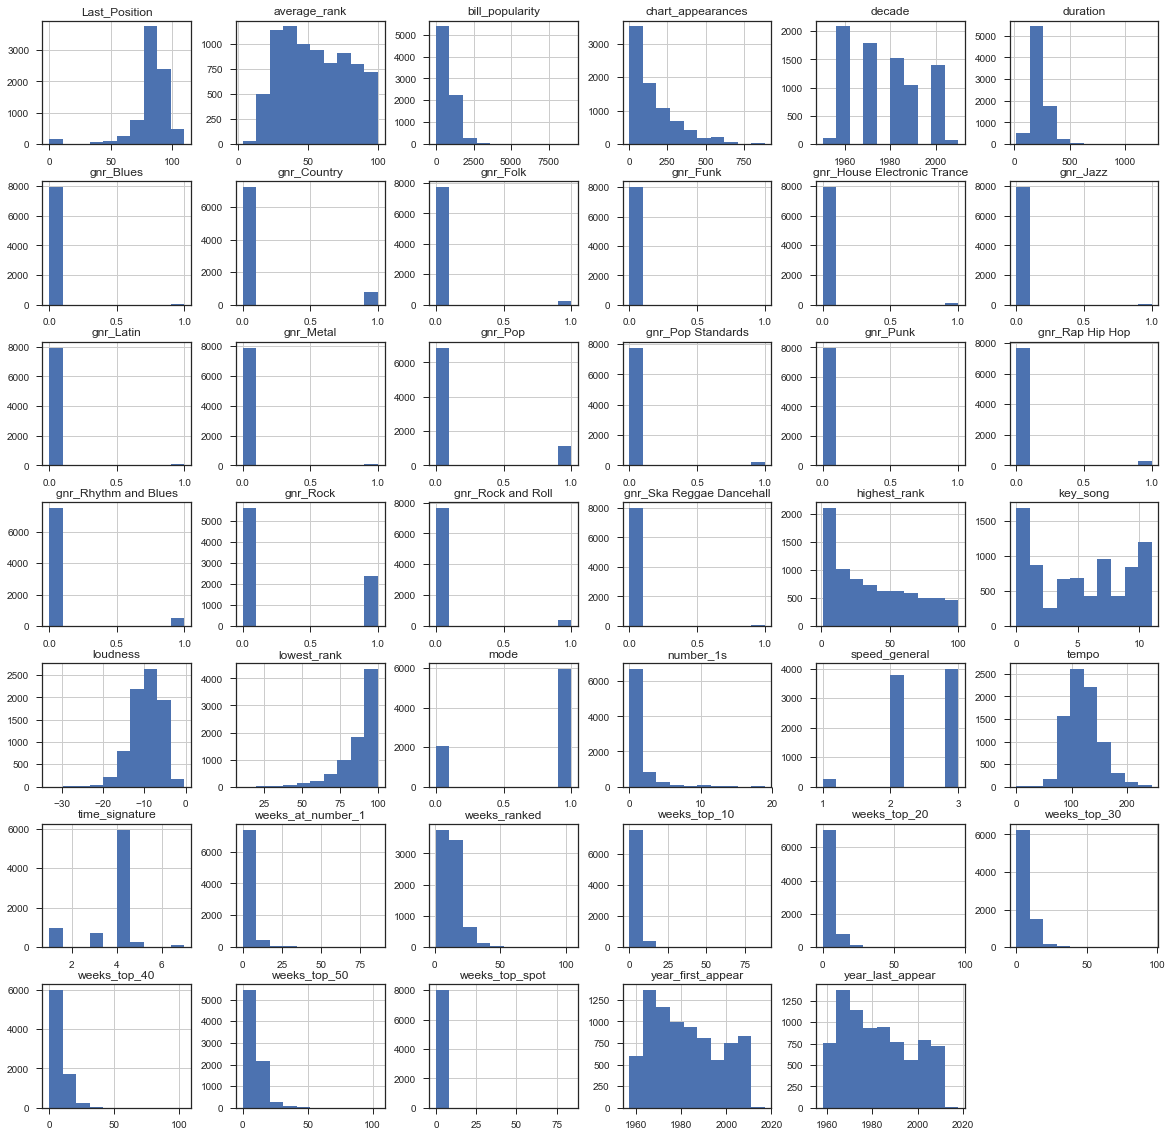

In [34]:
df.hist(figsize=(20,20))

In [98]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64','uint8']
newdf = df.select_dtypes(include=numerics)
#newdf.describe()
newdf.shape


(8011, 25)

#### Normalize data

In [99]:
from sklearn import preprocessing
normdf = preprocessing.normalize(newdf)
#normdf = preprocessing.scale(newdf)
normdf.shape
normdf = pd.DataFrame(normdf)
normdf.columns = newdf.keys()
normdf.head()

,bill_popularity,weeks_ranked,highest_rank,lowest_rank,weeks_top_spot,weeks_top_10,weeks_top_20,weeks_top_30,weeks_top_40,weeks_top_50,average_rank,year_first_appear,year_last_appear,decade,duration,key_song,loudness,mode,tempo,time_signature,Last_Position,number_1s,weeks_at_number_1,chart_appearances,speed_general
0,0.392414,0.005938,0.001033,0.025042,0.000000,0.001549,0.002582,0.003098,0.003873,0.004389,0.008778,0.511946,0.512204,0.511171,0.073836,0.000000,-0.002119,0.000258,0.031150,0.000775,0.024010,0.001291,0.005938,0.228994,0.000775
1,0.412979,0.007690,0.002563,0.025122,0.000000,0.000256,0.002051,0.003076,0.003845,0.004358,0.011792,0.508597,0.508597,0.507572,0.061011,0.001025,-0.001514,0.000000,0.030733,0.001025,0.024097,0.003076,0.008203,0.219691,0.000513
2,0.299406,0.005624,0.004285,0.025174,0.000000,0.000000,0.000803,0.001607,0.002946,0.003214,0.012587,0.531057,0.531325,0.530254,0.098552,0.002410,-0.001623,0.000000,0.030962,0.001071,0.023567,0.003214,0.008570,0.229509,0.000536
3,0.429131,0.006685,0.000257,0.025455,0.000771,0.002571,0.003085,0.003600,0.003857,0.004371,0.009256,0.510124,0.510381,0.509095,0.071736,0.000257,-0.002234,0.000257,0.028989,0.001028,0.023912,0.001800,0.002828,0.168927,0.000514
4,0.417956,0.005938,0.001291,0.025041,0.000000,0.002065,0.003356,0.003872,0.004131,0.004647,0.007745,0.511150,0.511408,0.511150,0.100165,0.002582,-0.003565,0.000000,0.033866,0.001033,0.021283,0.001807,0.002840,0.169609,0.000774


<b>Concat Genre Columns</b>

In [100]:
normdf = pd.concat([normdf,genres],axis=1)
normdf.describe()

,bill_popularity,weeks_ranked,highest_rank,lowest_rank,weeks_top_spot,weeks_top_10,weeks_top_20,weeks_top_30,weeks_top_40,weeks_top_50,average_rank,year_first_appear,year_last_appear,decade,duration,key_song,loudness,mode,tempo,time_signature,Last_Position,number_1s,weeks_at_number_1,chart_appearances,speed_general,gnr_Blues,gnr_Country,gnr_Folk,gnr_Funk,gnr_House Electronic Trance,gnr_Jazz,gnr_Latin,gnr_Metal,gnr_Pop,gnr_Pop Standards,gnr_Punk,gnr_Rap Hip Hop,gnr_Rhythm and Blues,gnr_Rock,gnr_Rock and Roll,gnr_Ska Reggae Dancehall
count,8011.000000,8011.000000,8011.000000,8011.000000,8011.000000,8011.000000,8011.000000,8011.000000,8011.000000,8011.000000,8011.000000,8011.000000,8011.000000,8011.000000,8011.000000,8011.000000,8011.000000,8011.000000,8011.000000,8011.000000,8011.000000,8011.000000,8011.000000,8011.000000,8011.000000,8011.000000,8011.000000,8011.000000,8011.000000,8011.000000,8011.000000,8011.000000,8011.000000,8011.000000,8011.000000,8011.000000,8011.000000,8011.000000,8011.000000,8011.000000,8011.000000
mean,0.189817,0.003599,0.010722,0.024961,0.000044,0.000427,0.000839,0.001236,0.001614,0.001978,0.015677,0.556135,0.556218,0.554862,0.064456,0.001473,-0.002655,0.000209,0.034187,0.001016,0.023174,0.000228,0.000624,0.043884,0.000692,0.010236,0.097366,0.034827,0.000499,0.011859,0.010111,0.008364,0.013981,0.143553,0.030208,0.003495,0.038572,0.062289,0.299838,0.047934,0.004369
std,0.153571,0.002002,0.008663,0.003760,0.000226,0.000870,0.001287,0.001584,0.001798,0.001954,0.007030,0.029135,0.029087,0.029077,0.021514,0.001010,0.001044,0.000123,0.008458,0.000307,0.004842,0.000505,0.001673,0.042336,0.000161,0.100660,0.296474,0.183353,0.022341,0.108257,0.100051,0.091075,0.117418,0.350657,0.171171,0.059020,0.192585,0.241695,0.458215,0.213640,0.065958
min,0.000000,0.000279,0.000104,0.003156,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000311,0.203163,0.203267,0.202436,0.004594,0.000000,-0.009583,0.000000,0.000000,0.000114,0.000000,0.000000,0.000000,0.000285,0.000210,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.056350,0.002044,0.002725,0.023384,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.009613,0.548410,0.548545,0.547231,0.049933,0.000564,-0.003334,0.000000,0.028053,0.001022,0.022197,0.000000,0.000000,0.011759,0.000569,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.165119,0.003440,0.008865,0.026041,0.000000,0.000000,0.000000,0.000000,0.001146,0.001739,0.015131,0.565994,0.566095,0.564842,0.061554,0.001448,-0.002575,0.000281,0.033523,0.001126,0.023846,0.000000,0.000000,0.030001,0.000587,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.294315,0.005037,0.017783,0.027712,0.000000,0.000281,0.001682,0.002463,0.002987,0.003339,0.021683,0.573580,0.573633,0.572210,0.073602,0.002337,-0.001851,0.000288,0.038841,0.001154,0.025902,0.000285,0.000576,0.060930,0.000856,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,0.935256,0.024896,0.029342,0.029367,0.008720,0.009557,0.010851,0.011940,0.012807,0.014848,0.029342,0.576813,0.576813,0.576030,0.310343,0.003238,-0.000078,0.000295,0.070957,0.002053,0.031370,0.005484,0.025207,0.250463,0.000883,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<b> Adding more Features </b>

In [101]:
normdf['is_top10'] = np.where(normdf['weeks_top_10']>0,1,0)
normdf['is_top40'] = np.where(normdf['weeks_top_40']>0,1,0)
normdf.head()

,bill_popularity,weeks_ranked,highest_rank,lowest_rank,weeks_top_spot,weeks_top_10,weeks_top_20,weeks_top_30,weeks_top_40,weeks_top_50,average_rank,year_first_appear,year_last_appear,decade,duration,key_song,loudness,mode,tempo,time_signature,Last_Position,number_1s,weeks_at_number_1,chart_appearances,speed_general,gnr_Blues,gnr_Country,gnr_Folk,gnr_Funk,gnr_House Electronic Trance,gnr_Jazz,gnr_Latin,gnr_Metal,gnr_Pop,gnr_Pop Standards,gnr_Punk,gnr_Rap Hip Hop,gnr_Rhythm and Blues,gnr_Rock,gnr_Rock and Roll,gnr_Ska Reggae Dancehall,is_top10,is_top40
0,0.392414,0.005938,0.001033,0.025042,0.000000,0.001549,0.002582,0.003098,0.003873,0.004389,0.008778,0.511946,0.512204,0.511171,0.073836,0.000000,-0.002119,0.000258,0.031150,0.000775,0.024010,0.001291,0.005938,0.228994,0.000775,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
1,0.412979,0.007690,0.002563,0.025122,0.000000,0.000256,0.002051,0.003076,0.003845,0.004358,0.011792,0.508597,0.508597,0.507572,0.061011,0.001025,-0.001514,0.000000,0.030733,0.001025,0.024097,0.003076,0.008203,0.219691,0.000513,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1
2,0.299406,0.005624,0.004285,0.025174,0.000000,0.000000,0.000803,0.001607,0.002946,0.003214,0.012587,0.531057,0.531325,0.530254,0.098552,0.002410,-0.001623,0.000000,0.030962,0.001071,0.023567,0.003214,0.008570,0.229509,0.000536,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,0.429131,0.006685,0.000257,0.025455,0.000771,0.002571,0.003085,0.003600,0.003857,0.004371,0.009256,0.510124,0.510381,0.509095,0.071736,0.000257,-0.002234,0.000257,0.028989,0.001028,0.023912,0.001800,0.002828,0.168927,0.000514,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,0.417956,0.005938,0.001291,0.025041,0.000000,0.002065,0.003356,0.003872,0.004131,0.004647,0.007745,0.511150,0.511408,0.511150,0.100165,0.002582,-0.003565,0.000000,0.033866,0.001033,0.021283,0.001807,0.002840,0.169609,0.000774,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1


### Visualize 

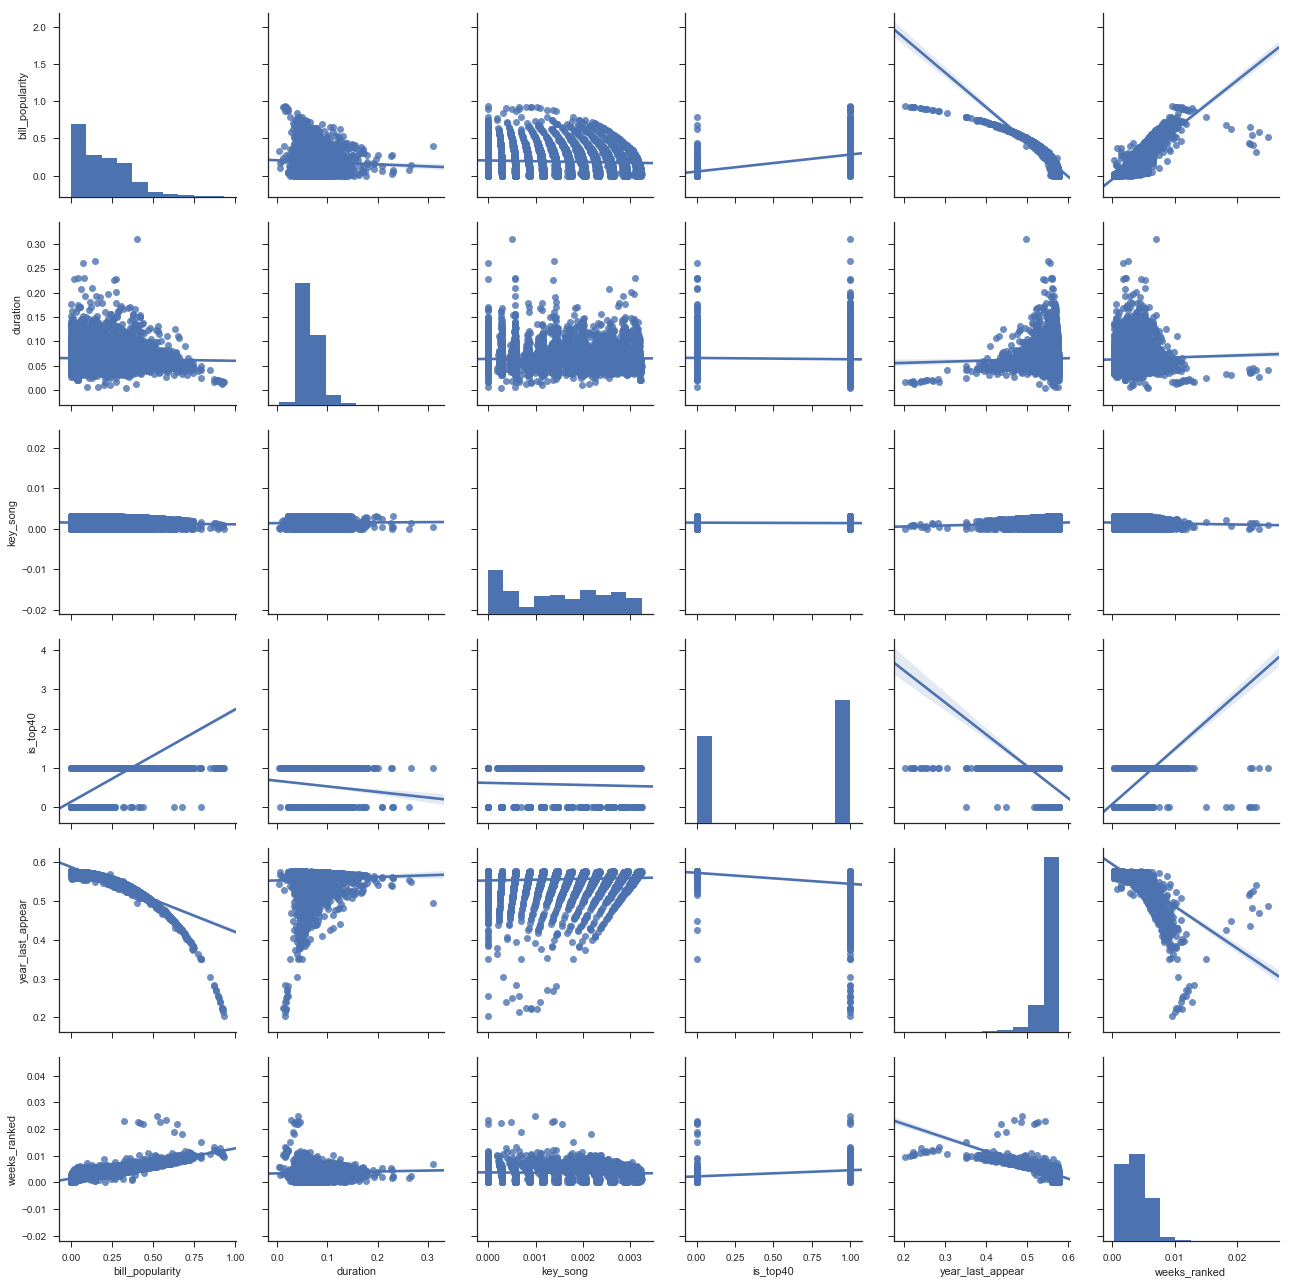

In [103]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import matplotlib.pyplot as plt
#g = sns.pairplot(df, size=1, vars=['bill_popularity', 'weeks_ranked', 'highest_rank', 'lowest_rank', 'weeks_top_spot', 'weeks_top_10', 'weeks_top_20', 'weeks_top_30', 'weeks_top_40', 'weeks_top_50', 'average_rank', 'first_appearance', 'year_first_appear', 'last_appearance', 'year_last_appear', 'decade', 'danceability', 'duration', 'end_of_fade_in', 'energy', 'key_confidence', 'key_song', 'loudness', 'mode', 'mode_confidence', 'start_of_fade_out', 'tempo', 'time_signature', 'time_signature_confidence', 'GrossDomesticProduct', 'PersonalIncome', 'Unemployment_Rate_Year_AVG', 'Adjusted_CPI_Year_AVG', 'Misery_Index_Year_AVG', 'Blues', 'Cumulative_Weeks', 'Unique_Song_Count', 'Unique_Artist_Count', 'as_chart_count', 'Total_Songs', 'Find_Duplicate_Titles', 'First_Year_on_Chart', 'Years_on_Chart', 'Points', 'Random', 'ChildrensMusic', 'Christian_Gospel', 'Christmas', 'Classical', 'Comedy', 'Country_', 'Folk', 'House_Electronic_Trance', 'Jazz', 'Last_Position', 'Latin', 'Latitude', 'Longitude', 'Metal', 'Neighborhood', 'Number_of_Records', 'Peak_Position', 'Pop_Standards', 'Pop', 'Punk', 'R_And_B', 'as_rank', 'Rap_Hip_Hop', 'Rock_And_Roll', 'Rock', 'Ska_Reggae_Dancehall', 'Soul', 'Soundtrack', 'Spoken_Word', 'Weeks_on_Chart', 'number_1s', 'weeks_at_number_1', 'chart_appearances', 'artist_weeks_at_number_1', 'tempo2', 'speed_general', 'num_weeks'], kind="reg")
g = sns.pairplot(normdf, size=3, vars=['bill_popularity', 'duration', 'key_song','is_top40','year_last_appear','weeks_ranked'], kind="reg")

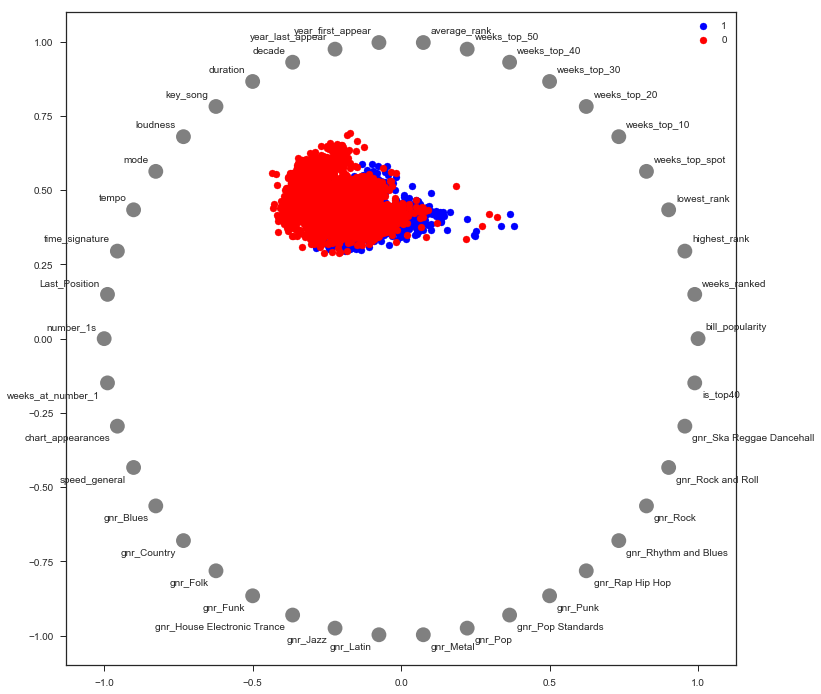

In [104]:
from pandas.plotting import radviz
plt.figure(figsize=(12,12))
radviz(normdf, 'is_top10',color=['blue','red'])
plt.show()

### Correlation Matrix Plot

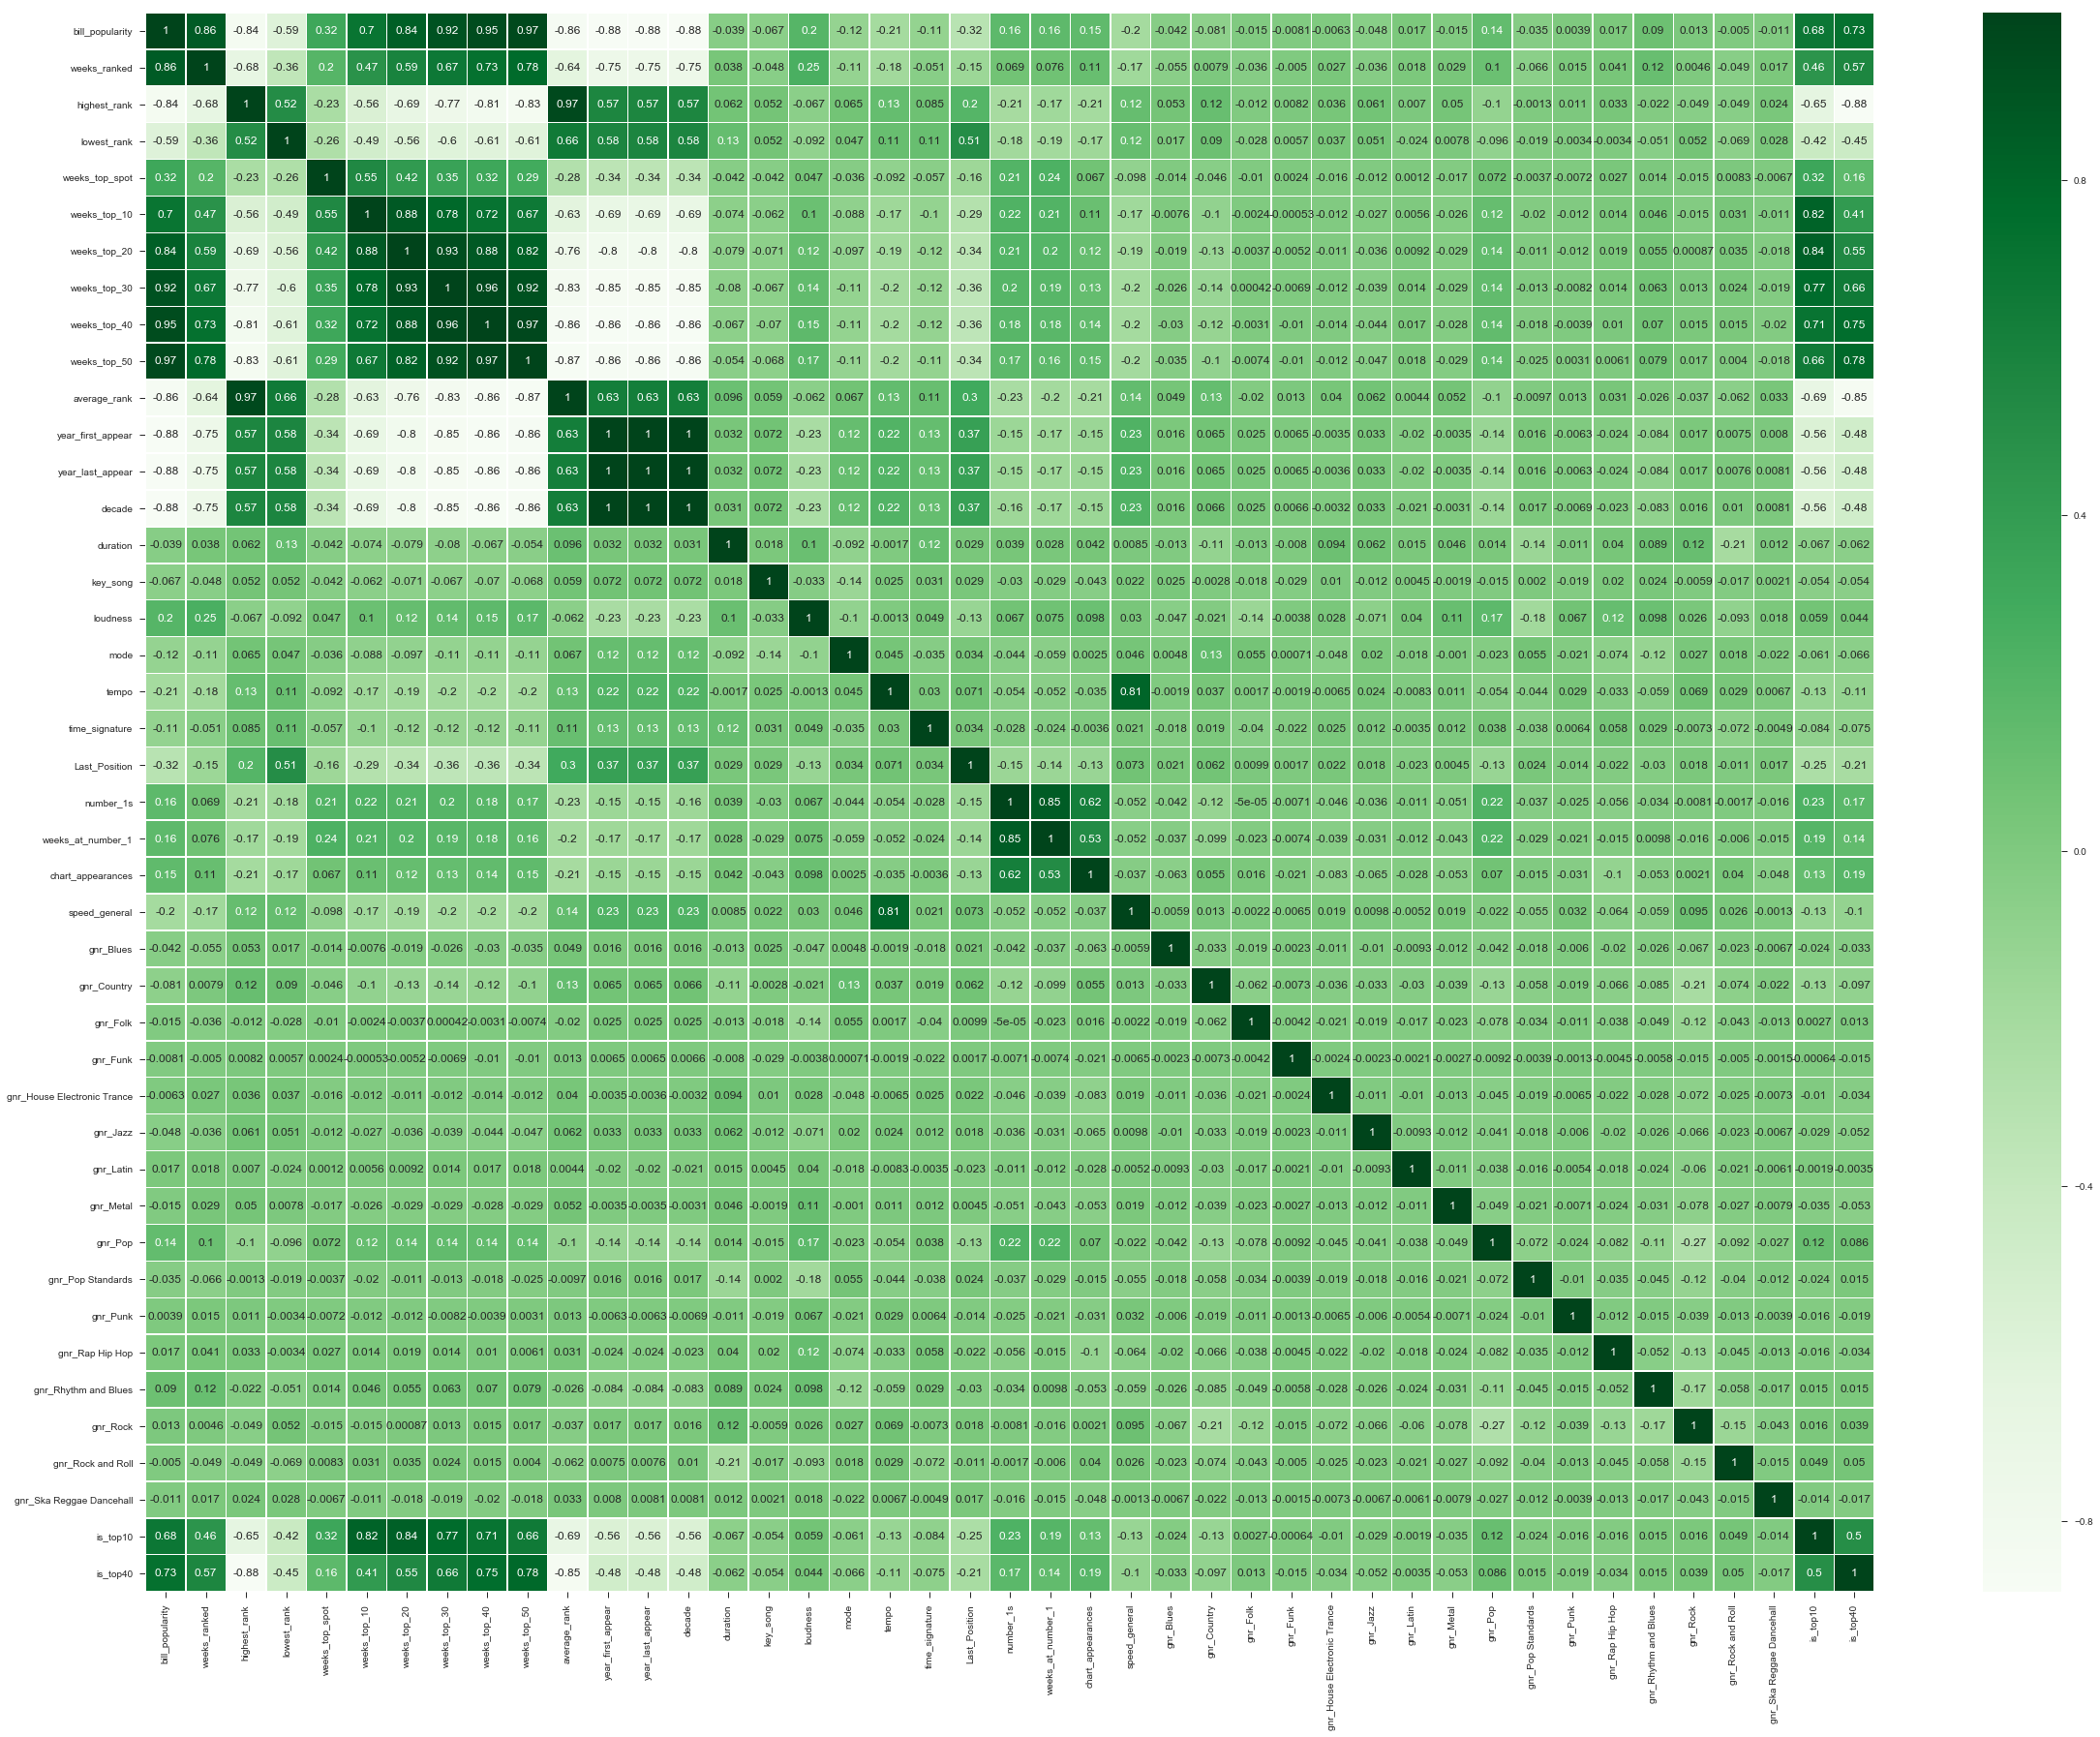

In [114]:
import seaborn as sns
corr = normdf.corr()
fig, ax = plt.subplots(figsize=(40,30)) 
ax=sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True, linewidths=.5, cmap="Greens")
plt.show()

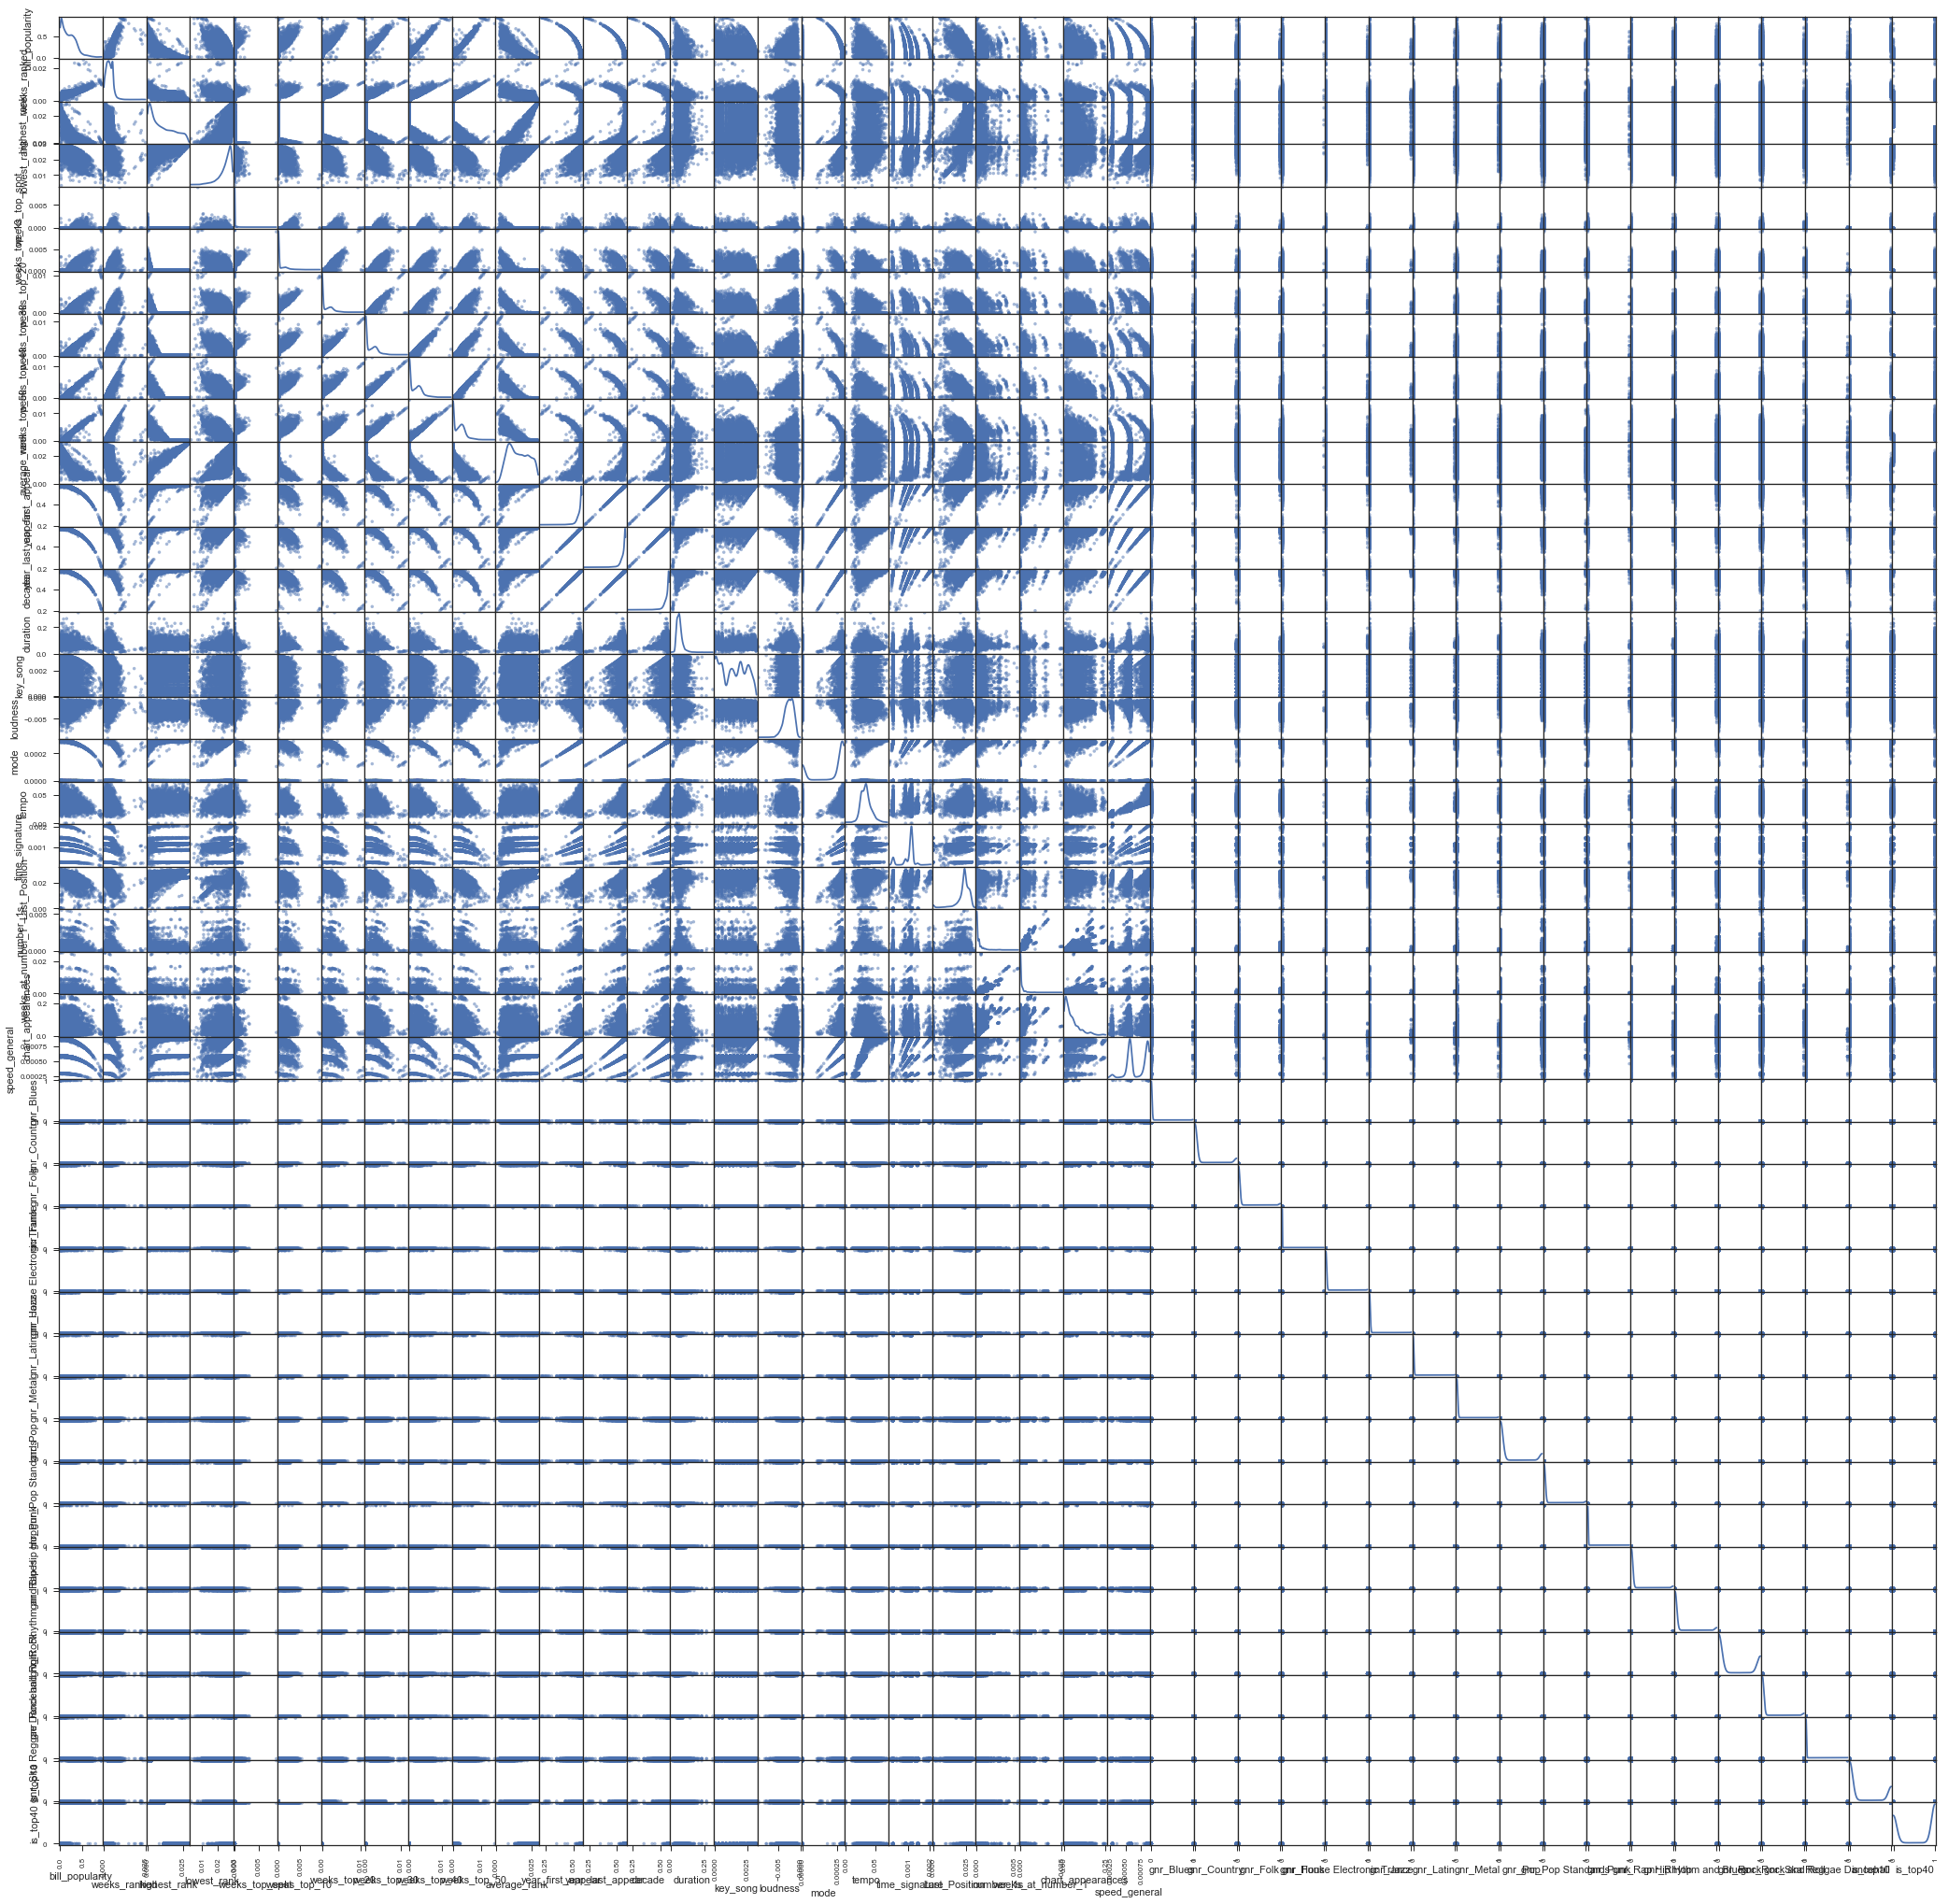

In [84]:
# Create a scatter matrix of the dataframe features
from pandas.plotting import scatter_matrix
scatter_matrix(normdf, alpha=0.5, figsize=(36, 36), diagonal='kde')
plt.show()

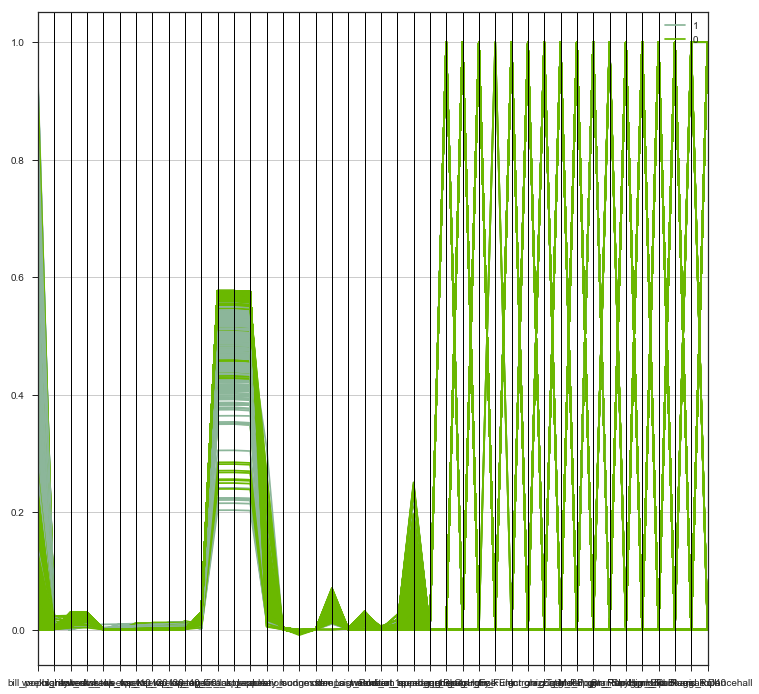

In [85]:
from pandas.plotting import parallel_coordinates
plt.figure(figsize=(12,12))
parallel_coordinates(normdf, 'is_top10')
plt.show()

<b>Saving Back to Database </b>

In [105]:
def sqlalchemy_engine():
    try:
        credentials = unencrypt()
        user_id = credentials.user
        user_password = credentials.password
        dbname = credentials.dbname
        server = credentials.server
        connstring = "mysql+mysqldb://{user}:{password}@{server}/{dbname}".format(server=server,user=user_id,password=user_password,dbname=dbname)
        engine = create_engine(connstring)
        return engine
    except Exception as e:
        print("Exception occurred \n" +str(e))

In [108]:
normdf.to_sql(con = sqlalchemy_engine(), name='songs_instance_normalized', if_exists='append')